In [2]:
import altair as alt
import streamlit as st
import pandas as pd
from pycaret.regression import *

In [3]:
crime_df = pd.read_csv("crimedata.csv")

In [4]:
crime_df.columns

Index(['communityName', 'state', 'countyCode', 'communityCode', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=146)

In [5]:
reg1 = setup(data = crime_df, target = "nonViolPerPop")

,Description,Value
0,session_id,7254
1,Target,nonViolPerPop
2,Original Data,"(2215, 146)"
3,Missing Values,True
4,Numeric Features,140
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1484, 1587)"


2022-12-05 07:34:09.618 INFO    logs: create_model_container: 0
2022-12-05 07:34:09.619 INFO    logs: master_model_container: 0
2022-12-05 07:34:09.620 INFO    logs: display_container: 1
2022-12-05 07:34:09.626 INFO    logs: Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='nonViolPerPop',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'p

In [7]:
lr = create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,63.5127,9009.7705,94.9198,0.9991,0.0190,0.0135
1,65.6612,11386.4795,106.7075,0.9982,0.0200,0.0146
2,77.2083,13673.5400,116.9339,0.9987,0.0270,0.0181
3,56.4931,11006.8477,104.9135,0.9987,0.0186,0.0124
4,85.3897,16810.9863,129.6572,0.9973,0.0283,0.0199
5,59.2624,11595.6758,107.6832,0.9980,0.0268,0.0149
6,78.3890,49169.4414,221.7418,0.9924,0.0411,0.0162
7,74.6792,10451.7666,102.2339,0.9984,0.0338,0.0202
8,15.4048,6715.7109,81.9494,0.9990,0.0132,0.0030


2022-12-05 07:35:36.623 INFO    logs: create_model_container: 1
2022-12-05 07:35:36.624 INFO    logs: master_model_container: 1
2022-12-05 07:35:36.624 INFO    logs: display_container: 2
2022-12-05 07:35:36.624 INFO    logs: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
2022-12-05 07:35:36.625 INFO    logs: create_model() succesfully completed......................................


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.3862,1.7830,1.0844,1.0000,0.0002,0.0001,0.0840
en,Elastic Net,0.2289,0.7440,0.6342,1.0000,0.0001,0.0000,0.0830
lar,Least Angle Regression,0.0073,0.0010,0.0160,1.0000,0.0000,0.0000,0.0570
omp,Orthogonal Matching Pursuit,0.0045,0.0000,0.0065,1.0000,0.0000,0.0000,0.0200
llar,Lasso Least Angle Regression,36.6835,2402.4272,48.8314,0.9997,0.0190,0.0111,0.0190
br,Bayesian Ridge,21.1031,7462.7262,55.7576,0.9988,0.0127,0.0046,7.5520
lr,Linear Regression,67.1972,16148.4467,121.3928,0.9977,0.0275,0.0159,0.2440
gbr,Gradient Boosting Regressor,153.6772,214500.2957,392.3653,0.9760,0.0552,0.0319,0.4790
rf,Random Forest Regressor,189.9315,296798.7572,491.4201,0.9657,0.0693,0.0387,0.5430
et,Extra Trees Regressor,176.9724,389371.2296,526.3931,0.9569,0.0721,0.0371,0.4870


2022-12-05 07:40:42.005 INFO    logs: create_model_container: 19
2022-12-05 07:40:42.005 INFO    logs: master_model_container: 19
2022-12-05 07:40:42.006 INFO    logs: display_container: 3
2022-12-05 07:40:42.006 INFO    logs: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=7254,
      selection='cyclic', tol=0.0001, warm_start=False)
2022-12-05 07:40:42.007 INFO    logs: compare_models() succesfully completed......................................


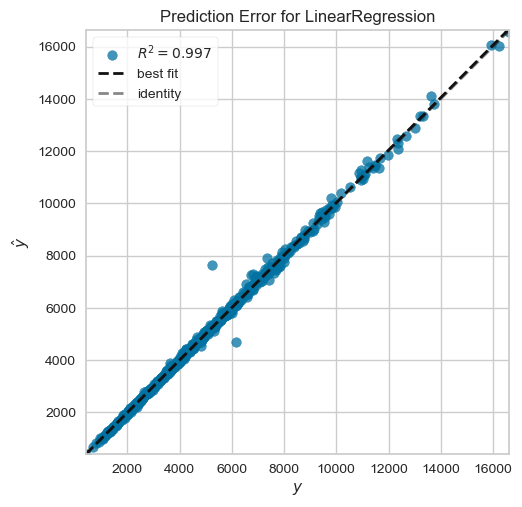

2022-12-05 07:51:20.611 INFO    logs: Visual Rendered Successfully
2022-12-05 07:51:20.748 INFO    logs: plot_model() succesfully completed......................................


In [12]:
plot_model(lr, plot='error')

In [7]:
corr_matrix = crime_df.corr()

In [13]:
corr_matrix.to_csv('corr.csv')

In [20]:
corr_matrix.index

Index(['countyCode', 'communityCode', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=144)

In [21]:
corr_matrix = corr_matrix.reset_index(level=0)

In [32]:
temp = corr_matrix[['index', 'murders']].sort_values(by="murders", ascending=False)
 

In [34]:
census_stats = ['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85']

In [48]:
temp[temp['index'].isin(census_stats)]['index'].iloc[0]

'NumKidsBornNeverMar'

In [50]:
crime_selected_corr = corr_matrix[['index', 'murders']].sort_values(by='murders', ascending=False)
filtered_corr = crime_selected_corr[crime_selected_corr['index'].isin(census_stats)]['index'].iloc[0]

In [51]:
filtered_corr

'NumKidsBornNeverMar'